In [13]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import glob
import os,sys
import fitsio as fio
import matplotlib as mpl
from tqdm import tqdm
import proplot as pplt
import pickle
import pandas as pd
from des_y6utils import viz
from matplotlib.colors import LogNorm
%matplotlib inline

In [37]:
f = open('/global/cfs/cdirs/des/y6-shear-catalogs/metadetection/mdet_files_1267tiles.txt', 'r')
fs = f.read().split('\n')[:-1]
mdet_files = []
for fname in fs:
    fn = os.path.join('/global/cscratch1/sd/myamamot/metadetect/cuts_final/riz/wmom', fname.split('/')[-1])
    if os.path.exists(fn):
        mdet_files.append(fn)
tilenames = [f.split('/')[-1].split('_')[0] for f in mdet_files]

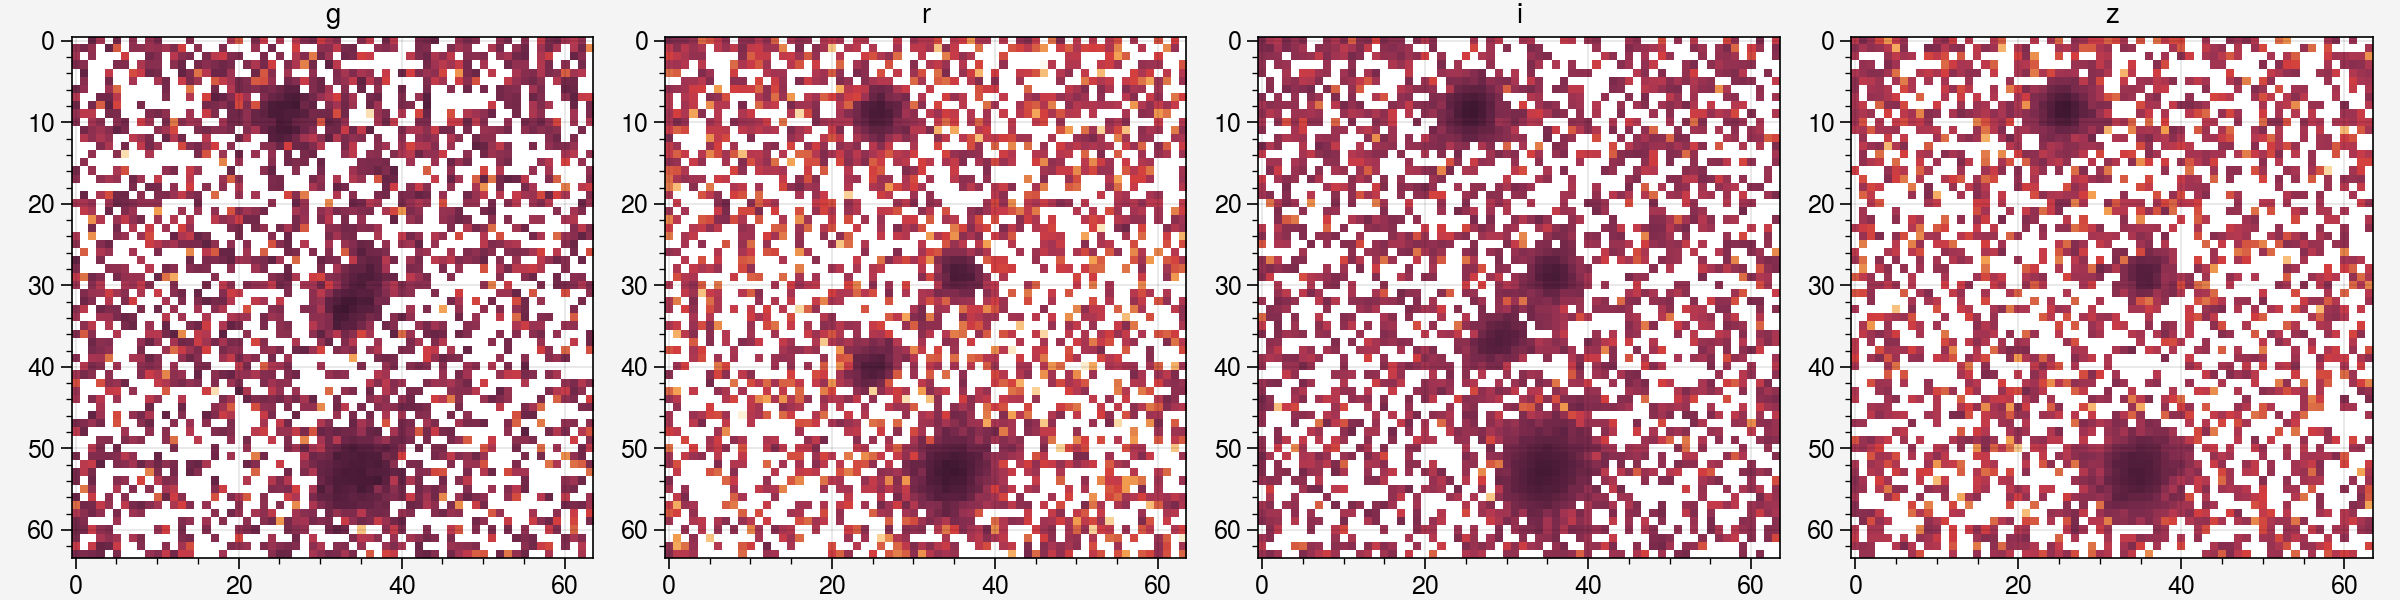

In [49]:
layout = np.arange(4).reshape(1, 4)
fig,ax = plt.subplot_mosaic(layout, figsize=(12,3))
n = None
for i,tilename in enumerate(tilenames):
    if os.path.exists(f"""/global/cscratch1/sd/myamamot/des-y6-analysis/data/pg_cuts/{tilename}_g0.fits"""):
        dg = fio.read(f"""/global/cscratch1/sd/myamamot/des-y6-analysis/data/pg_cuts/{tilename}_g0.fits""")
        dr = fio.read(f"""/global/cscratch1/sd/myamamot/des-y6-analysis/data/pg_cuts/{tilename}_r0.fits""")
        di = fio.read(f"""/global/cscratch1/sd/myamamot/des-y6-analysis/data/pg_cuts/{tilename}_i0.fits""")
        dz = fio.read(f"""/global/cscratch1/sd/myamamot/des-y6-analysis/data/pg_cuts/{tilename}_z0.fits""")
        if n is None:
            n = 0
        else:
            n += 1
    else:
        continue
    # fig,ax=plt.subplots(nrows=1, ncols=4, figsize=(12,3))
    
    ax[0+n*4].imshow(dg, norm=LogNorm())
    ax[1+n*4].imshow(dr, norm=LogNorm())
    ax[2+n*4].imshow(di, norm=LogNorm())
    ax[3+n*4].imshow(dz, norm=LogNorm())
    
    ax[0+n*4].set_title('g')
    ax[1+n*4].set_title('r')
    ax[2+n*4].set_title('i')
    ax[3+n*4].set_title('z')

plt.tight_layout()
# plt.savefig('mdet_lowsnr_highT_highg.png', bbox_inches='tight')

In [42]:
n

20